# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *
import warnings
warnings.filterwarnings('ignore')

/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
variables['categorical_variables'].extend(['date_weekday','admission_weekday','date_month','admission_month'])

In [5]:
date_variables = ['date_weekday','admission_weekday','date_month','admission_month']

In [6]:
categorical_variables = ['images_requester_roles',
 'images_study_types',
 'labos_requester_roles',
 'sectors_last_sector',
 'sectors_names',
 'surgeries_actual',
 'surgeries_anesthesia_types',
 'surgeries_bact_positive',
 'surgeries_injury_condition',
 'surgeries_post_surgery_condition',
 'surgeries_scheduled',
 'surgeries_scheduled_done',
 'surgeries_services',
 'surgeries_types',
 'gender',
 'insurance_entity',
 'entity_group',
 'origin',
 'admission_sector',
 'isolation',
 'presumptive_dianogsis',
 'responsible_sector',
 'ARM_TEP',
 'CEC_TEP',
 'request_origin',
 'request',
 'request_diagnosis',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [7]:
numerical_variables = variables['numerical_variables']

In [13]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                'categorical_features' : ['date_weekday','admission_weekday','date_month','admission_month']
                #'numerical_features' : variables['numerical_variables']
               }

In [14]:
lgbm_dateonly_features = Model(**model_params)
lgbm_dateonly_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming categorical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


### Baseline

In [15]:
%%time
lgbm_dateonly_features.fit_classifier()

Training classifier
[10]	training_set's auc: 0.618082	validation_set's auc: 0.611594
[20]	training_set's auc: 0.620919	validation_set's auc: 0.611646
[30]	training_set's auc: 0.623593	validation_set's auc: 0.612449
[40]	training_set's auc: 0.625018	validation_set's auc: 0.612795
[50]	training_set's auc: 0.626128	validation_set's auc: 0.612841
[60]	training_set's auc: 0.626859	validation_set's auc: 0.613099
[70]	training_set's auc: 0.62751	validation_set's auc: 0.61338
[80]	training_set's auc: 0.628039	validation_set's auc: 0.613451
[90]	training_set's auc: 0.628294	validation_set's auc: 0.613268
[100]	training_set's auc: 0.628606	validation_set's auc: 0.613113
CPU times: user 8.12 s, sys: 286 ms, total: 8.41 s
Wall time: 14.4 s


In [16]:
len(lgbm_dateonly_features.model_features)

33

In [17]:
lgbm_dateonly_features.get_performance_metrics()

training AUC ROC score:  0.6286063439277708
validation AUC ROC score:  0.6131131292795517
relative over-fitting:  0.0246469269645158


### Date + Extrafeatures

#### Baseline

In [8]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                'categorical_features' : categorical_variables,
                'numerical_features' : numerical_variables
               }

In [9]:
lgbm_date_features = Model(**model_params)
lgbm_date_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


In [31]:
%%time
lgbm_date_features.fit_classifier()

Training classifier
[10]	training_set's auc: 0.860514	validation_set's auc: 0.854732
[20]	training_set's auc: 0.868251	validation_set's auc: 0.860746
[30]	training_set's auc: 0.872139	validation_set's auc: 0.863595
[40]	training_set's auc: 0.875196	validation_set's auc: 0.865906
[50]	training_set's auc: 0.877569	validation_set's auc: 0.867203
[60]	training_set's auc: 0.878836	validation_set's auc: 0.868125
[70]	training_set's auc: 0.880083	validation_set's auc: 0.868982
[80]	training_set's auc: 0.881214	validation_set's auc: 0.869549
[90]	training_set's auc: 0.882397	validation_set's auc: 0.869965
[100]	training_set's auc: 0.883248	validation_set's auc: 0.870365
CPU times: user 46.1 s, sys: 886 ms, total: 47 s
Wall time: 38.6 s


In [21]:
len(lgbm_date_features.model_features)

26756

In [22]:
lgbm_date_features.get_performance_metrics()

training AUC ROC score:  0.8832477924542377
validation AUC ROC score:  0.8703652826523423
relative over-fitting:  0.014585385790888219


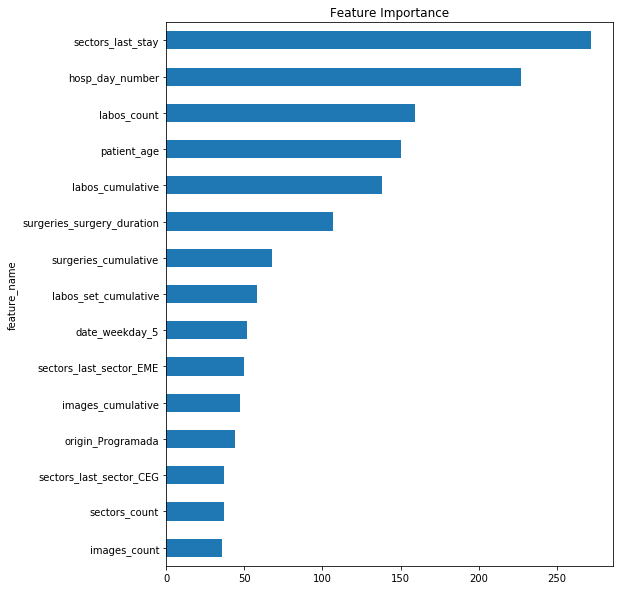

In [32]:
lgbm_date_features.plot_feature_importance(15)

In [10]:
lgbm_param_grid = {'max_depth': [3,7,10,15,30],
                  'learning_rate': [0.1,0.05,0.01,0.001,0.0001],
                  'num_iterations': [50,100,150,200,300]}

In [ ]:
lgbm_date_features.optimize_hyperparams(params_dict=lgbm_param_grid,
                                         n_folds=3,n_iter=5,
                                         search_type='grid')

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   10.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   23.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  7.0min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  9.8min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 12.8min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 16.2min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 19.3min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 21.6min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed: 25.4min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 30.0min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed: 35.2min
[Parallel(

In [18]:
exp_results = lgbm_date_features.get_model_selection_results()

In [ ]:
exp_results.to_csv('experiments/lgb_date_features_grid_search_results.csv')

In [20]:
best_params = lgbm_date_features.model_selection.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 7, 'num_iterations': 200}

In [ ]:
%%time
lgbm_date_features.fit_best_classifier()

In [ ]:
lgbm_date_features.get_performance_metrics()

In [ ]:
lgbm_date_features.plot_feature_importance(15)

In [ ]:
import pickle
outputfile ='experiments/date_features_model/lgbm_date_features_optimized.pkl'
with open(outputfile, 'wb') as pickle_file:
    pickle.dump(lgbm_date_features, pickle_file)

### Random Forest

In [24]:
model_params = {'classifier': 'random_forest',
               'accepts_sparse': True,
                'categorical_features' : categorical_variables,
                'numerical_features' : numerical_variables
               }

In [25]:
rf_date_features = Model(**model_params)
rf_date_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


In [26]:
%%time
rf_date_features.fit_classifier()

Training classifier
[10]	training_set's auc: 0.840344	validation_set's auc: 0.836231
[20]	training_set's auc: 0.840496	validation_set's auc: 0.836394
[30]	training_set's auc: 0.840452	validation_set's auc: 0.836343
[40]	training_set's auc: 0.840424	validation_set's auc: 0.836255
[50]	training_set's auc: 0.841122	validation_set's auc: 0.836863
[60]	training_set's auc: 0.841116	validation_set's auc: 0.836829
[70]	training_set's auc: 0.841094	validation_set's auc: 0.836825
[80]	training_set's auc: 0.841302	validation_set's auc: 0.836921
[90]	training_set's auc: 0.841707	validation_set's auc: 0.837647
[100]	training_set's auc: 0.841702	validation_set's auc: 0.837515
CPU times: user 49.1 s, sys: 694 ms, total: 49.8 s
Wall time: 44 s


In [27]:
rf_date_features.get_performance_metrics()

training AUC ROC score:  0.8417018209692959
validation AUC ROC score:  0.8375152798613352
relative over-fitting:  0.00497390049975121


In [14]:
rf_param_grid = {'max_depth': [3,7,10,15,30],
                  'bagging_fraction': [0.5,0.7,0.8,0.9],
                  'num_iterations': [50,100,150,200,300]}

In [15]:
rf_date_features.optimize_hyperparams(params_dict=rf_param_grid,n_folds=3,search_type='grid')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.2s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   48.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.9min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  9.2min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 11.0min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 16.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 20.9min
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed: 22.6min finished


{'mean_fit_time': array([ 18.35230319,  22.49105167,  29.02735027,  43.90030471,
          7.11494263,  10.91593575,  14.44926278,  21.7092034 ,
         22.87233202,  34.39189704,  44.168365  ,  68.22285962,
         11.02731975,  15.57228772,  20.95006967,  30.31606301,
         38.39459443,  58.00918023,  76.36053308, 119.20530462,
         16.43630679,  24.71530485,  33.07221874,  48.75604169]),
 'std_fit_time': array([2.38424045, 0.1955741 , 0.4237287 , 0.36712506, 0.11580417,
        0.12332684, 0.09702811, 0.47329554, 0.36045461, 1.26346451,
        0.63433614, 2.33111499, 0.59631469, 0.4338153 , 0.05047927,
        0.50838067, 1.053346  , 1.0882689 , 0.94952359, 2.02807219,
        0.18965679, 0.33556775, 0.5468608 , 5.22387405]),
 'mean_score_time': array([1.47419294, 1.84619403, 2.67519212, 3.59847029, 1.31455763,
        1.88671271, 2.46947527, 3.97129337, 1.39374916, 2.21484319,
        2.84794569, 4.41730976, 1.41149306, 2.16817967, 2.94690688,
        4.21879832, 1.688723

In [16]:
exp_results = rf_date_features.get_model_selection_results()
exp_results.to_csv('experiments/rf_date_features_grid_search_results.csv')

In [17]:
best_params = rf_date_features.model_selection.best_params_
best_params

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
rf_date_features.fit_best_classifier()

In [ ]:
import pickle
outputfile ='experiments/date_features_model/rf_date_features_optimized.pkl'
with open(outputfile, 'wb') as pickle_file:
    pickle.dump(rf_date_features, pickle_file)